In [1]:
import numpy as np
import pandas as pd
import itertools
from sklearn.metrics import accuracy_score
import datetime
from sklearn.model_selection import train_test_split
from more_itertools import set_partitions
import math
import random
from sklearn.utils import resample
import os

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_mutual_info_score
from scipy.spatial import distance


In [2]:
file_path = 'iris.data'


In [3]:
df = pd.read_csv(file_path, sep=',')

In [5]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
headers = list(df.columns)
headers.remove('class')

In [7]:
X = df.iloc[:,:-1]
Y = df.iloc[:, -1]

In [8]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
Y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object

In [9]:
# fit scaler on data
norm = MinMaxScaler().fit(X)

# transform data
X = norm.transform(X)


In [40]:
def process_pca(X, Y):
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(X)
    finalDf = pd.DataFrame(data = principalComponents
                 , columns = ['principal component 1', 'principal component 2'])
    
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    targets = np.unique(Y)
    colors = ['r', 'g', 'b', 'y']
    for target, color in zip(targets,colors):
        indicesToKeep = Y == target
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                   , finalDf.loc[indicesToKeep, 'principal component 2']
                   , c = color
                   , s = 50)
    ax.legend(targets)
    ax.grid()

In [36]:
np.unique(y_train)

array([0, 1, 2])

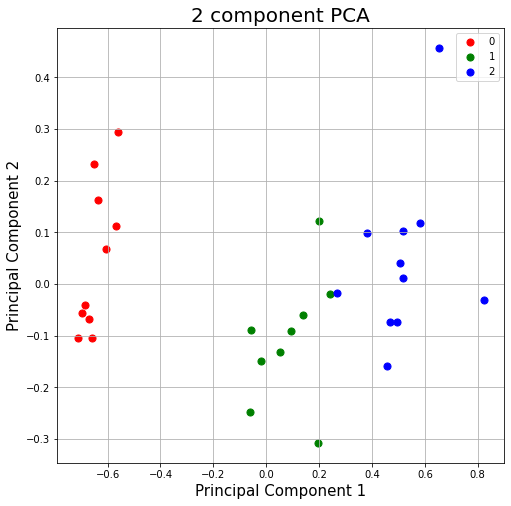

In [40]:
process_pca(X_test, y_test)

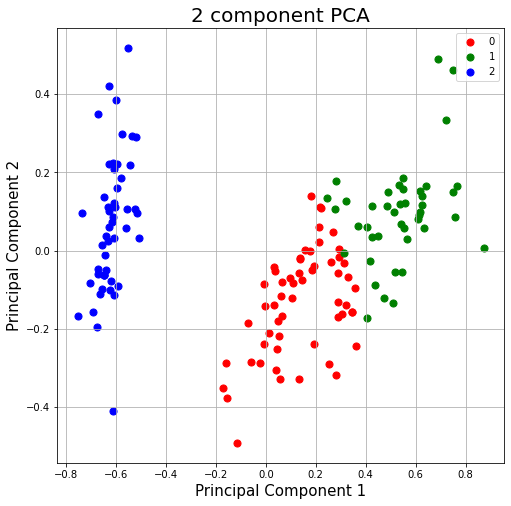

In [41]:
process_pca(X, labels2)

In [10]:
labels

NameError: name 'labels' is not defined

In [12]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
le = preprocessing.LabelEncoder()
le.fit(Y.unique())

LabelEncoder()

In [11]:
y = le.transform(Y)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
y_train

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [35]:
km2 = KMeans2(M=3)


In [36]:
%time {km2.fit(X)}
labels2 = km2.predict(X)

0
           37.92479299762479
0.01
           2.5503139316123864
0.02
           0.2522293701232101
0.03
           0.26883667304433345
0.04
           0.26474803895792576
0.05
           0.2606747875923716
0.060000000000000005
           0.25661601309171544
0.07
           0.09864142717717073
0.08
           0.22994324404788813
0.09
           0.22905884770077733
0.09999999999999999
           0.18115436389589945
0.10999999999999999
           0.8066447443835685
0.11999999999999998
           3.890447401591313
0.12999999999999998
           2.6176750302879306
0.13999999999999999
           0.8605725508979134
0.15
           0.3668855850364565
0.16
           0.336343311450797
0.17
           0.30121649045405974
0.18000000000000002
           0.26849366127700236
0.19000000000000003
           0.23859468429453656
0.20000000000000004
           0.2523320001192957
0.21000000000000005
           0.2494830695042758
0.22000000000000006
           0.24666176683572516
0.23000000000000007
    

In [37]:
km2.centroids

array([[0.42952675, 0.29475309, 0.56528562, 0.5316358 ],
       [0.68055556, 0.44384058, 0.77560796, 0.80344203],
       [0.19611111, 0.59083333, 0.07864407, 0.06      ]])

In [32]:
km = KMeans(3)


In [33]:
%time {km.fit(X)}
labels = km.predict(X)

Wall time: 24.9 ms


In [92]:
np.array(y)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [120]:
np.array(labels2)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [83]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [38]:
print(adjusted_mutual_info_score(y, labels2))

0.7269875441315985


In [31]:
class KMeans2:
    def __init__(self, M: int, p_max=0.99, p_step=0.01, beta=0, tol=1e-5, t_max=100, seed=-1):
        """
        :param k: Number of Clusters
        :param t_max: Maximum number of iterations if hasn't reached convergence yet.
        :param seed: Fixed seed to allow reproducibility.
        :param tol: Relative tolerance with regards difference in the cluster centers of two consecutive iterations to
        declare convergence.
        """
        if M < 1:
            raise ValueError('K must be a positive number')
        if p_max < 0 or p_max >= 1:
            raise ValueError('p must belong to the set [0,1)')
        if beta < 0 or beta > 1:
            raise ValueError('beta must belong to the set [0,1]')
        
        self.M = M
        self.p_max = p_max
        self.p_step = p_step
        self.beta = beta
        self.t_max = t_max
        self.seed = seed
        self.tol = tol
        self.metric = 'euclidean'
        
        self.centroids = None
        self.previous_centroids = None
        
        self.t = 0
        self.p_init = 0
        self.p = 0
        
        self.w = np.ones(self.M) * 1/self.M
        self.w_p = {self.p : np.ones(self.M) * 1/self.M}
        self.delta = None
        self.delta_p = {}
        self.ew = 0
        self.V = np.zeros(self.M)
        
        
    def fit(self, x: np.ndarray):
        """
        Compute cluster centers and predict cluster index for each sample.
        :param x: 2D data array of size (rows, features).
        """
        if self.seed < 0:
            np.random.seed()
        else:
            np.random.seed(self.seed)

        self.X = x
        # Initialize centroids
        self._init_centroids()
        empty = False # no empty or singleton clusters yet detected
        while True:
            print(self.p)
            self.t += 1
            distances = self._distances(x)
            self.delta, nearest_ids = self._weighted_distances(x)
            if False in [len(i) > 1 for i in nearest_ids]:
                empty = True
                self.p = self.p - self.p_step
                if self.p < self.p_init:
                    return None
                
                self.w = self.w_p[self.p]
                self.delta =self.delta_p[self.p]
                
                
            self.previous_centroids = self.centroids.copy()
            self._update_centroids()
            if self.p < self.p_max and empty == False:
                self.delta_p[self.p] = self.delta
                self.w_p[self.p] = self.w
                self.p += self.p_step
            self._update_weights()
            
            if self._check_convergence():
                break

    def predict(self, x: np.ndarray):
        """
        Assign labels to a list of observations.
        :param x: 2D data array of size (rows, features).
        :return: Cluster indexes assigned to each row of X.
        """
        if self.centroids is None:
            raise Exception('Fit the model with some data before running a prediction')

        distances = self._distances(x)
        labels, self.nearest, nearest_ids = self._get_nearest(x, distances)

        return labels

    def fit_predict(self, x: np.ndarray):
        """
        Fit the model with data and return assigned labels.
        :param x: 2D data array of size (rows, features).
        :return: Cluster indexes assigned to each row of X.
        """
        self.fit(x)
        return self.predict(x)

    def _init_centroids(self):
        """Initialize centroids"""
        init_centroids = np.random.choice(range(self.X.shape[0]), size=self.M, replace=False)
        self.centroids = self.X[init_centroids, :]

    def _ew_difference(self):
        """
        Calculate the distance between old centroids and new ones (SD).
        :return: SD.
        """
        ew_t_1 = self.ew
        ew_t = 0
        for k in range(self.M):
            ew_t += np.power(self.w[k], self.p) * self.V[k]
        self.ew = ew_t
        print('           {}'.format(np.abs(ew_t - ew_t_1)))
        return np.abs(ew_t - ew_t_1)
    
    def _distances(self, x: np.ndarray):
        """
        Calculate distance from each point of the dataset to each cluster.
        :param x: 2D data array of size (rows, features).
        :return: Distance matrix of shape (K, number of points)
        """
        distances = np.zeros(shape=(x.shape[0], self.M))
        
        for row_id, row in enumerate(x):
            for centroid_id, centroid in enumerate(self.centroids):
                distances[row_id, centroid_id] = self._calculate_distance(centroid, row)

        return distances
    def _weighted_distances(self, x: np.ndarray):
        """
        Calculate distance from each point of the dataset to each cluster.
        :param x: 2D data array of size (rows, features).
        :return: Distance matrix of shape (K, number of points)
        """
        distances = np.zeros(shape=(x.shape[0], self.M))
        nearest_id = [[] for _ in range(self.M)]
        weighted_distances = np.zeros(shape=(x.shape[0], self.M))
        delta = np.zeros(shape=(x.shape[0], self.M))
        for row_id, row in enumerate(x):
            for centroid_id, centroid in enumerate(self.centroids):
                d = self._calculate_distance(centroid, row)
                distances[row_id, centroid_id] = d
                weighted_distances[row_id, centroid_id] = np.power(self.w[centroid_id], self.p)*d
            cluster_id = int(np.argmin(weighted_distances[row_id, :]))
            nearest_id[cluster_id].append(row_id)
            delta[row_id, cluster_id] = 1
        return delta, nearest_id

    def _calculate_distance(self, x: np.ndarray, y: np.ndarray):
        """
        Calculate distance between 2 elements using the metric depending on the algorithm ('euclidean').
        :param x: 1D vector with all x attributes.
        :param y: 1D vector with all y attributes.
        :return: Distance between both vectors using the specified metric.
        """
        return distance.cdist(np.array([x]), np.array([y]), metric=self.metric)[0][0]

    def _get_nearest(self, x: np.ndarray, distances: np.ndarray):
        """
        Compute the distance for each dataset instance to each centroid.
        :param x: 2D data array of size (rows, features).
        :param distances: 2D vector of distances between centroids and points.
        :return: Cluster indexes assigned to each observation (labels for each point).
                 List of nearest observations for each cluster.
                 List of nearest observations index for each cluster.
        """
        clusters = []
        nearest = [[] for _ in range(self.M)]
        nearest_id = [[] for _ in range(self.M)]

        for row_id, row in enumerate(x):
            cluster_id = int(np.argmin(distances[row_id, :]))

            clusters.append(cluster_id)
            nearest[cluster_id].append(row)
            nearest_id[cluster_id].append(row_id)

        return clusters, nearest, nearest_id


    def _update_centroids(self):
        for k in range(self.M):
            nearest_ids = self.delta[:, k] == 1
            nearests = self.X[nearest_ids]
            if nearests.shape[0] > 0:
                self.centroids[k, :] = np.mean(np.array(nearests), axis=0)
            else:
                self.centroids[k, :] = np.zeros(self.M)
    def _update_weights(self):
        V_t = np.zeros(self.M)
        for row_id, row in enumerate(self.X):
            for centroid_id, centroid in enumerate(self.centroids):
                if self.delta[row_id, centroid_id] == 1:
                    V_t[centroid_id] += self._calculate_distance(centroid, row)
        self.V = V_t
        z = np.sum(np.power(V_t, 1/(1-self.p)))
        w_t = np.zeros(self.M)
        for k in range(self.M):
            w_t[k] = self.beta * self.w[k] + (1-self.beta)*(np.power(V_t[k], 1/(1-self.p))/z)
        self.w = w_t
    def _check_convergence(self):
        """Check the termination criterions"""
        if self.t >= self.t_max:
            return True
        elif self._ew_difference() < self.tol:
            return True
        else:
            return False


In [113]:
a = np.zeros((2,3))

In [99]:
X.shape[0]

150

In [115]:
a[1, 2] = 1

In [116]:
a

array([[0., 0., 0.],
       [0., 0., 1.]])

In [74]:
a = [1,5,6]

In [76]:
np.sum(np.power(a, 2))

62

In [22]:
np.ones(3) * 1/3

array([0.33333333, 0.33333333, 0.33333333])

In [26]:
np.power(4, 1/2)

2.0

In [37]:
a = [[4,5], [5,6], [7,8], [6,7]]

In [29]:
any(a)

True

In [38]:
b = [len(x) > 1 for x in a]

In [39]:
if False in b:
    print('kkk')

In [40]:
empty = False in b

In [78]:
np.abs(-5)

5

In [42]:
np.mean([1,2,3])

2.0

In [46]:
s = {'k':3}

In [43]:
s['k'] = 3

NameError: name 's' is not defined

In [77]:
np.power(3, 2)

9

In [67]:
mm = np.array([1,1,1,1,5,3,3,2,2,5,2,5,2,5,5,7,2])

In [68]:
indi = mm == 8

In [69]:
indi

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [70]:
dd = X[0:17]

In [71]:
dd.shape[0]

17

In [73]:
dd[indi].shape[0]

0

In [59]:
dd

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ]])

In [60]:
X[:, 1]

array([0.625     , 0.41666667, 0.5       , 0.45833333, 0.66666667,
       0.79166667, 0.58333333, 0.58333333, 0.375     , 0.45833333,
       0.70833333, 0.58333333, 0.41666667, 0.41666667, 0.83333333,
       1.        , 0.79166667, 0.625     , 0.75      , 0.75      ,
       0.58333333, 0.70833333, 0.66666667, 0.54166667, 0.58333333,
       0.41666667, 0.58333333, 0.625     , 0.58333333, 0.5       ,
       0.45833333, 0.58333333, 0.875     , 0.91666667, 0.45833333,
       0.5       , 0.625     , 0.45833333, 0.41666667, 0.58333333,
       0.625     , 0.125     , 0.5       , 0.625     , 0.75      ,
       0.41666667, 0.75      , 0.5       , 0.70833333, 0.54166667,
       0.5       , 0.5       , 0.45833333, 0.125     , 0.33333333,
       0.33333333, 0.54166667, 0.16666667, 0.375     , 0.29166667,
       0.        , 0.41666667, 0.08333333, 0.375     , 0.375     ,
       0.45833333, 0.41666667, 0.29166667, 0.08333333, 0.20833333,
       0.5       , 0.33333333, 0.20833333, 0.33333333, 0.375  